In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
inpfile = open("Wiki_Vote.txt",'r')
all_lines = inpfile.read().splitlines()
all_lines_new = []
global from_nodes, to_nodes
from_nodes = []
to_nodes = []
for i in range(len(all_lines)):
    line = all_lines[i]
    line = line.split("\t")
    line[0] = int(line[0])
    line[1] = int(line[1])
    all_lines_new.append(line)
    from_nodes.append(line[0])
    to_nodes.append(line[1])

global all_edges, edge_list
all_edges = all_lines_new
all_edges.sort()
edge_list = all_edges

In [3]:
a = set(from_nodes)
# print(len(a))
b = set(to_nodes)
# print(len(b))
c = a.union(b)
# print(len(c))
all_nodes = list(c)
all_nodes.sort()
# print(all_nodes)
global nodeid_to_index, index_to_nodeid
nodeid_to_index = {}
index_to_nodeid = {}
for i in range(len(all_nodes)):
    node = all_nodes[i]
    nodeid_to_index[node]=i
    index_to_nodeid[i]=node

In [4]:
d = a.intersection(b)
print(len(d))

1376


In [5]:
global graph, adj_mat
graph = np.zeros((7115,7115),dtype=int)

In [6]:
for i in range(len(all_edges)):
    edge = all_edges[i]
    from_node = edge[0]
    to_node = edge[1]
    graph[nodeid_to_index[from_node]][nodeid_to_index[to_node]]=1

adj_mat = graph

In [7]:
MAX_NUM_EDGES = int((len(all_nodes)*(len(all_nodes)-1))/2)*2

In [8]:
def detect_self_loop():
    for i in edge_list:
        if(i[0]==i[1]):
            return True
    return False

print(detect_self_loop())

False


In [9]:
def detect_bidirection():
    for i in edge_list:
        from_node = i[0]
        to_node = i[1]
        from_node_index = nodeid_to_index[from_node]
        to_node_index = nodeid_to_index[to_node]
        if (adj_mat[to_node_index][from_node_index]==1):
            return True
    return False

print(detect_bidirection())

True


In [10]:
def getedge(from_node,to_node):
    if (from_node not in all_nodes):
        return -1
    if (to_node not in all_nodes):
        return -1
    from_node_index = nodeid_to_index[from_node]
    to_node_index = nodeid_to_index[to_node]
    return adj_mat[from_node_index][to_node_index]

In [11]:
getedge(30,1412)

1

In [12]:
adj_mat

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [13]:
def get_num_of_nodes():
    return len(adj_mat)

def get_num_of_edges():
    return len(edge_list)

def get_avg_in_degree():
    global in_degrees
    in_degrees = []
    new_edge_list = sorted(edge_list,key=lambda x:x[1])
    current_node = new_edge_list[0][1]
    count = 1
    for i in range(1,len(new_edge_list)):
        node = new_edge_list[i][1]
        if (current_node == node):
            count+=1
            if (i == len(new_edge_list) - 1):
                in_degrees.append(count)
        else:
            current_node = node
            in_degrees.append(count)
            count = 1
            if (i == len(new_edge_list) - 1):
                in_degrees.append(count)
    return sum(in_degrees)/len(all_nodes)


In [14]:
def get_avg_out_degree():
    global out_degrees
    out_degrees = []
    new_edge_list = edge_list
    current_node = new_edge_list[0][0]
    bigcount=1
    count = 1
    for i in range(1,len(new_edge_list)):
        bigcount+=1
        node = new_edge_list[i][0]
        if (current_node == node):
            count+=1
            if (i == len(new_edge_list) - 1):
                out_degrees.append(count)
        else:
            current_node = node
            out_degrees.append(count)
            count = 1
            if (i == len(new_edge_list) - 1):
                out_degrees.append(count)
    # print(bigcount)
    return sum(out_degrees)/len(all_nodes)

In [15]:
def get_node_max_in_deg():
    in_degrees = {}
    new_edge_list = sorted(edge_list,key=lambda x:x[1])
    current_node = new_edge_list[0][1]
    count = 1
    for i in range(1,len(new_edge_list)):
        node = new_edge_list[i][1]
        if (current_node == node):
            count+=1
            if (i == len(new_edge_list) - 1):
                in_degrees[node]=count
        else:
            in_degrees[current_node]=count
            current_node = node
            count = 1
            if (i == len(new_edge_list) - 1):
                in_degrees[node]=count
    sorted_in_deg = sorted(in_degrees.items(),key=lambda x:x[1],reverse=True)
    return sorted_in_deg[0][0]

In [16]:
def get_node_max_out_deg():
    out_degrees = {}
    new_edge_list = sorted(edge_list,key=lambda x:x[0])
    current_node = new_edge_list[0][0]
    count = 1
    for i in range(1,len(new_edge_list)):
        node = new_edge_list[i][0]
        if (current_node == node):
            count+=1
            if (i == len(new_edge_list) - 1):
                out_degrees[node]=count
        else:
            out_degrees[current_node]=count
            current_node = node
            count = 1
            if (i == len(new_edge_list) - 1):
                out_degrees[node]=count
    sorted_out_deg = sorted(out_degrees.items(),key=lambda x:x[1],reverse=True)
    return sorted_out_deg[0][0]
    

In [17]:
def get_network_density():
    return (len(edge_list)/MAX_NUM_EDGES)

In [18]:
print("Average In Degree",get_avg_in_degree())
print("Average Out Degree",get_avg_out_degree())
print("Node ID having maximum In-Degree",get_node_max_in_deg())
print("Node ID having maximum Out-Degree",get_node_max_out_deg())
print("Network Density",get_network_density())

Average In Degree 14.573295853829936
Average Out Degree 14.573295853829936
Node ID having maximum In-Degree 4037
Node ID having maximum Out-Degree 2565
Network Density 0.0020485375110809584


In [19]:
def get_freq(degrees):
    freq_dict = {}
    for i in degrees:
        if i in freq_dict:
            freq_dict[i]+=1
        else:
            freq_dict[i]=1
    nodes_having_atleast1 = len(degrees)
    nodes_having_zero = len(all_nodes)-nodes_having_atleast1
    freq_dict[0]=nodes_having_zero
    return freq_dict



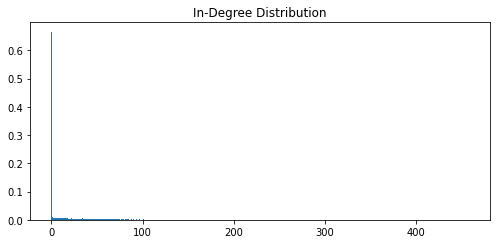

In [20]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.title("In-Degree Distribution")

freq_dict = get_freq(in_degrees).items()
x_axis2 = []
y_axis2 = []

for i in freq_dict:
    x_axis2.append(i[0])
    y_axis2.append(i[1]/len(all_nodes))

plt.bar(x_axis2,y_axis2,width=1)
plt.show()


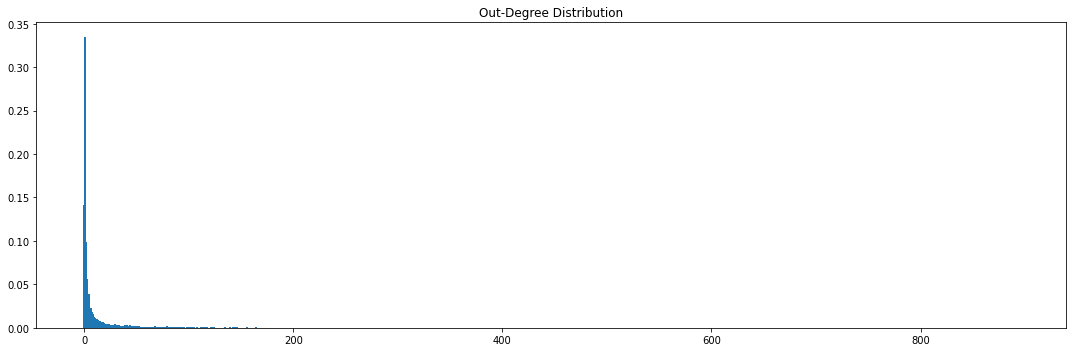

In [21]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.title("Out-Degree Distribution")

freq_dict = list(get_freq(out_degrees).items())
x_axis = []
y_axis = []
freq_dict.sort()
for i in freq_dict:
    x_axis.append(i[0])
    y_axis.append(i[1]/len(all_nodes))

plt.bar(x_axis,y_axis,width=2)
plt.show()

In [22]:
def neighbourhood():
    nodes_neighbors = {}
    for i in edge_list:
        from_node = i[0]
        to_node = i[1]
        if from_node in nodes_neighbors:
            if to_node in nodes_neighbors[from_node]:
                pass
            else:
                nodes_neighbors[from_node].append(to_node)
        else:
            nodes_neighbors[from_node]=[]
            nodes_neighbors[from_node].append(to_node)
        if to_node in nodes_neighbors:
            if from_node in nodes_neighbors[to_node]:
                pass
            else:
                nodes_neighbors[to_node].append(from_node)
        else:
            nodes_neighbors[to_node] = []
            nodes_neighbors[to_node].append(from_node)
    return nodes_neighbors

In [23]:
def num_intersect(neighs):
    count = 0
    for i in neighs:
        neighs2 = neighs.copy()
        neighs2.remove(i)
        for j in neighs2:
            id1 = nodeid_to_index[i]
            id2 = nodeid_to_index[j]
            if (adj_mat[id1][id2]==1):
                count+=1
    return count


In [24]:
nodes_neighbors = neighbourhood()

In [25]:
lcc = []
for i in nodes_neighbors:
    neighs = nodes_neighbors[i]
    numerator = num_intersect(neighs)
    deno = len(neighs)*(len(neighs)-1)
    if (deno==0):
        # print(i)
        val = 0
    else:
        val = numerator/deno
    lcc.append(val)

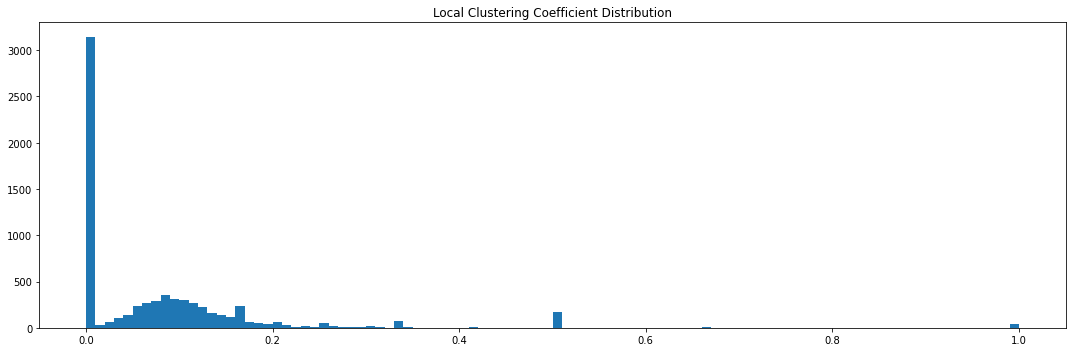

In [26]:
plt.title("Local Clustering Coefficient Distribution")
plt.hist(lcc, bins=np.arange(min(lcc), max(lcc) + 0.01, 0.01))
plt.show()


In [27]:
import networkx as nx

In [28]:
global NXGraph
NXGraph = nx.DiGraph()

for i in edge_list:
    NXGraph.add_edge(i[0],i[1])

In [29]:
print(NXGraph.number_of_nodes())
print(NXGraph.number_of_edges())

7115
103689


In [30]:
pr = nx.pagerank(NXGraph)

In [40]:
result = nx.hits(NXGraph)
hubs = result[0]
auths = result[1]

In [47]:
auths_sorted = sorted(auths.items(),key=lambda x:x[1],reverse=True)
print(auths_sorted[0])
print(auths_sorted[1])
print(auths_sorted[2])

(2398, 0.0025801471780088747)
(4037, 0.0025732411242297914)
(3352, 0.0023284150914976817)


In [46]:
hubs_sorted = sorted(hubs.items(),key=lambda x : x[1],reverse=True)
print(hubs_sorted[0])
print(hubs_sorted[1])
print(hubs_sorted[2])

(2565, 0.007940492708143137)
(766, 0.00757433529750124)
(2688, 0.006440248991029857)


In [52]:
print(getedge(2565,2398))
print(getedge(2565,4037))
print(getedge(2565,3352))
print(getedge(766,2398))
print(getedge(766,4037))
print(getedge(766,3352))
print(getedge(2688,2398))
print(getedge(2688,4037))
print(getedge(2688,3352))



1
1
1
1
0
1
1
1
1


In [53]:
pr_sorted = sorted(pr.items(),key=lambda x : x[1],reverse=True)
print(pr_sorted[0])
print(pr_sorted[1])
print(pr_sorted[2])

(4037, 0.004612715891167545)
(15, 0.0036812207295292693)
(6634, 0.0035248136576402577)


In [62]:
top_auths = []
top_prs = []
top_hubs = []
for i in range(20):
    top_auths.append(auths_sorted[i][0])
    top_prs.append(pr_sorted[i][0])
    top_hubs.append(hubs_sorted[i][0])

print("Common Results Top 20 PageRank and Auth",len(set(top_auths).intersection(set(top_prs))))
print("Common Results Top 10 PageRank and Hubs",len(set(top_hubs).intersection(set(top_prs))))

Common Results Top 20 PageRank and Auth 9
Common Results Top 10 PageRank and Hubs 1


In [59]:
def num_to_node(nodeid):
    preneighs = []
    to_node_index = nodeid_to_index[nodeid]
    for i in range(len(adj_mat)):
        if adj_mat[i][to_node_index]==1:
            preneighs.append(index_to_nodeid[i])
    return preneighs

In [61]:
print(len(num_to_node(2398)))
print(len(num_to_node(4037)))
print(len(num_to_node(15)))


340
457
361


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=14fea53d-f02c-4224-97a4-dcba4c056548' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>